In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
! git clone https://github.com/askmuhsin/eva_training_flow

Cloning into 'eva_training_flow'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 121 (delta 64), reused 85 (delta 37), pack-reused 0
Receiving objects: 100% (121/121), 382.79 KiB | 0 bytes/s, done.
Resolving deltas: 100% (64/64), done.
Checking connectivity... done.


In [4]:
import sys
sys.path.append('./eva_training_flow/')

In [5]:
from ds_toolkit.general_utils.gpu_utils import addGPU
addGPU()

CUDA environment device set to 1


In [6]:
from main import Trainer, show_misclassification
from models import resnet_v2_6ch_ending

try:
    import wandb
except ModuleNotFoundError as e:
    print(e, 'Logging module failed to import !')

epochs = 40

[INFO] seed set 1
[INFO] Cuda Avaliable :  True
[INFO] device :  cuda


## Resnet with 6X6 channel size ending

In [7]:
trainer = Trainer(
    resnet_v2_6ch_ending.ResNet18(),
#     model_path='../data/model_state/R18_6_channel_with_augmentation_3_repeat.pt'
)

[INFO] Loading Data



Extracting ./data/cifar-10-python.tar.gz to ./data
[INFO] train dataset of size 50000 loaded...
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded...
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded...
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]           1,728
       BatchNorm2d-2           [-1, 64, 28, 28]             128
            Conv2d-3           [-1, 64, 28, 28]          36,864
       BatchNorm2d-4           [-1, 64, 28, 28]             128
            Conv2d-5           [-1, 64, 28, 28]          36,864
       BatchNorm2d-6           [-1, 64, 28, 28]             128
        BasicBlock-7           [-1, 64, 28, 28]               0
            Conv2d-8           [-1, 64, 28, 28]          36,864
       BatchNorm2d-9           [-1, 64, 28, 28]             128
           Conv2d-10           [-1

In [8]:
trainer.train_model(epochs=2)

  0%|          | 0/391 [00:00<?, ?it/s]

[INFO] Begin training for 2 epochs


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0097         Acc:56.29         [5629 / 10000]


TRAIN Epoch:1 Loss:0.8112 Batch:390 Acc:63.57: 100%|██████████| 391/391 [00:35<00:00, 11.11it/s]


TEST         Loss:0.0079         Acc:65.55         [6555 / 10000]


[INFO] device :  cuda


Generating sample predictions: 79it [00:03, 22.25it/s]


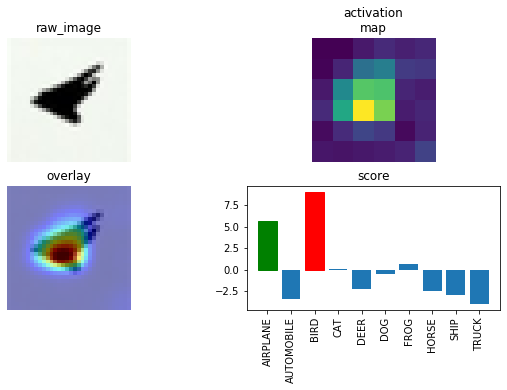

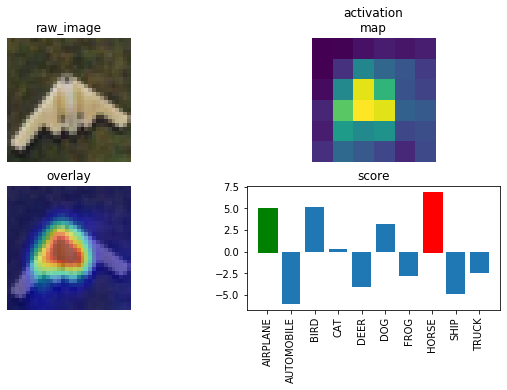

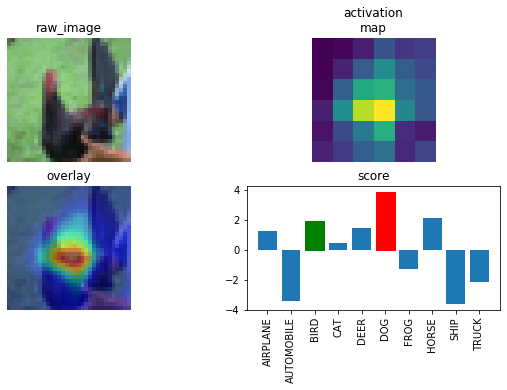

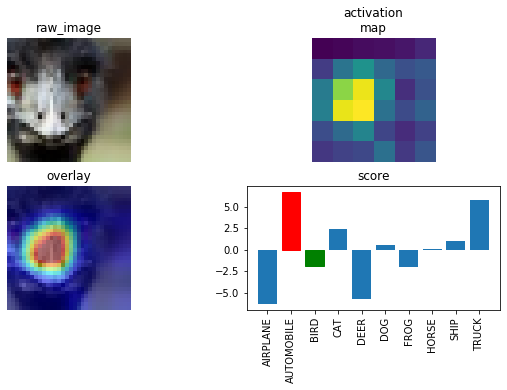

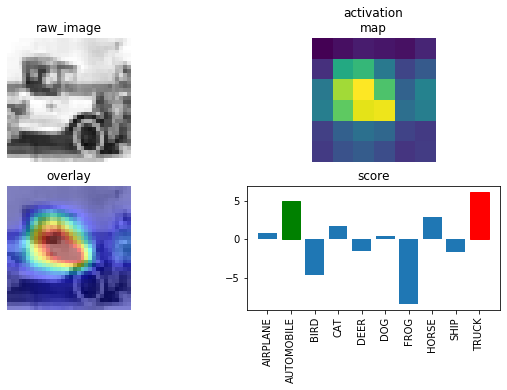

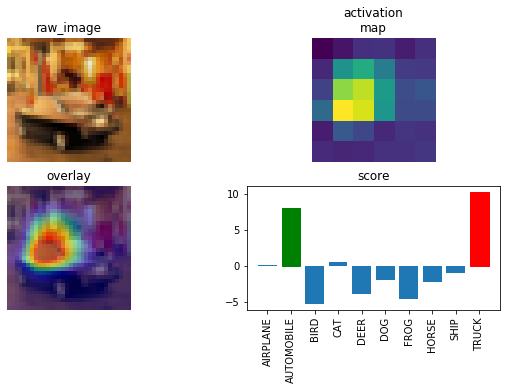

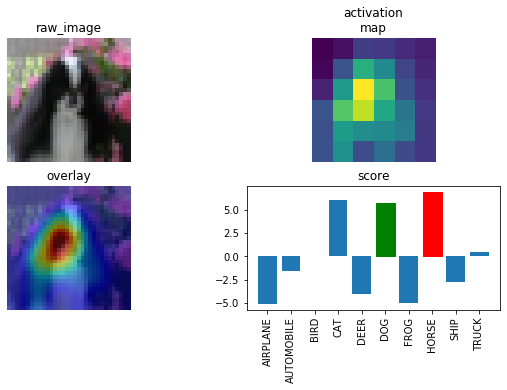

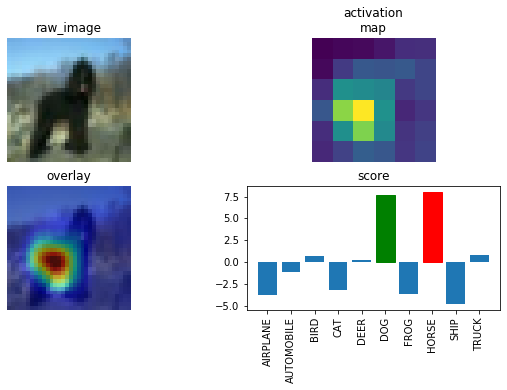

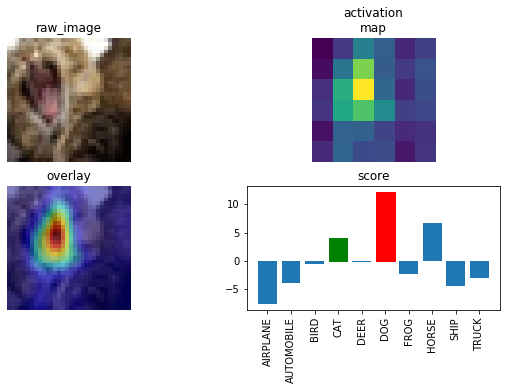

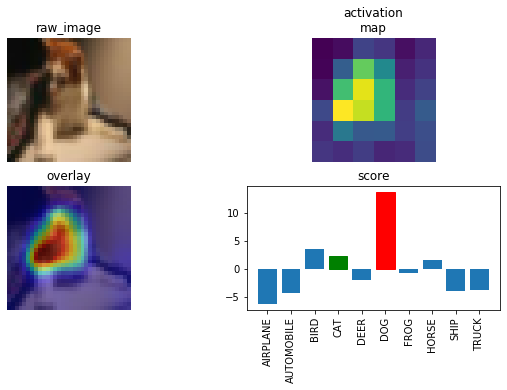

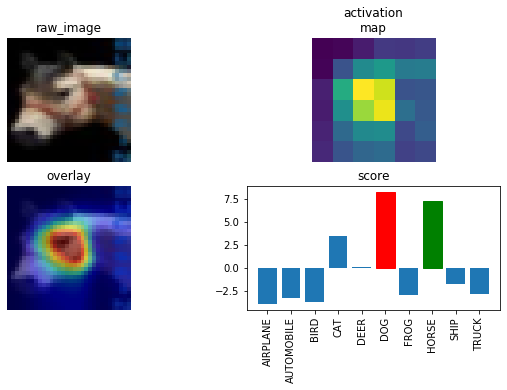

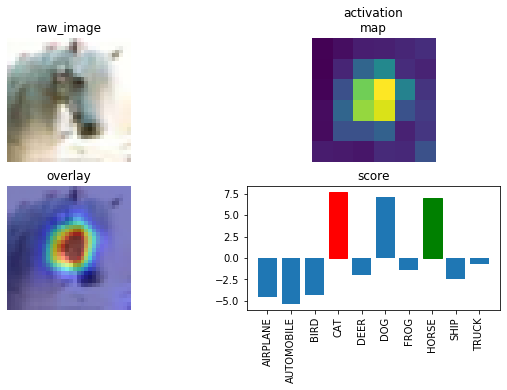

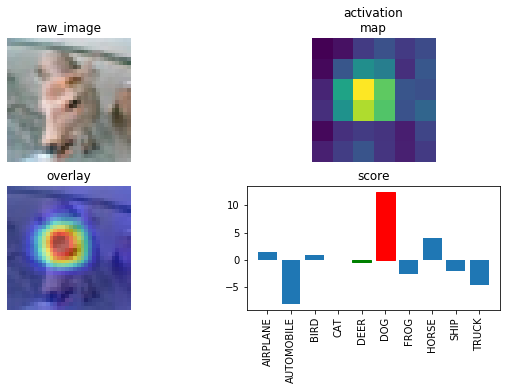

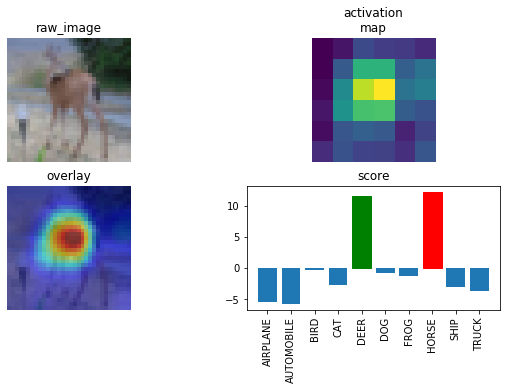

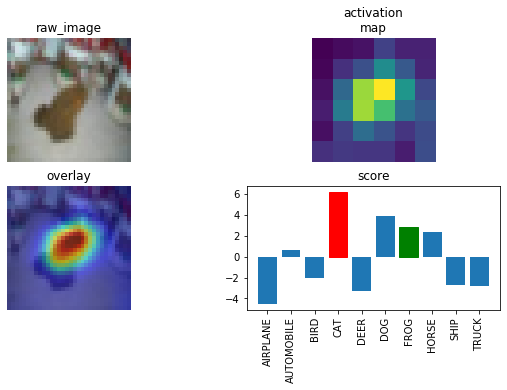

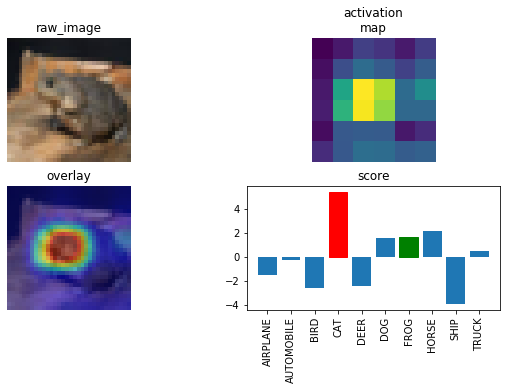

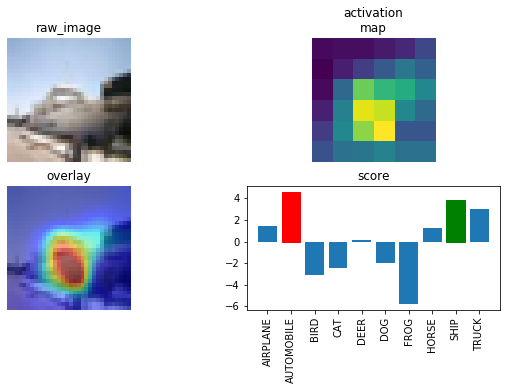

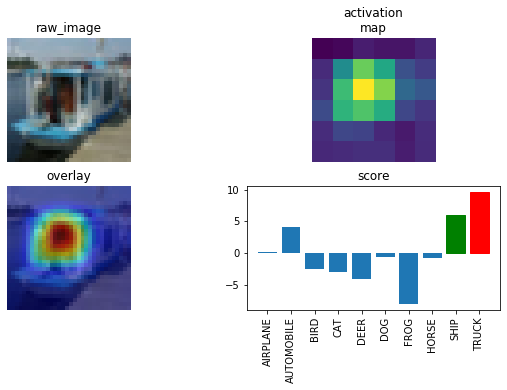

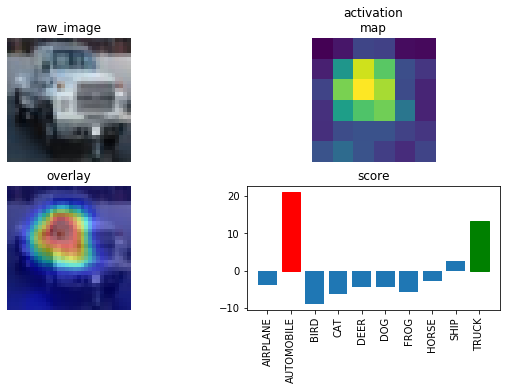

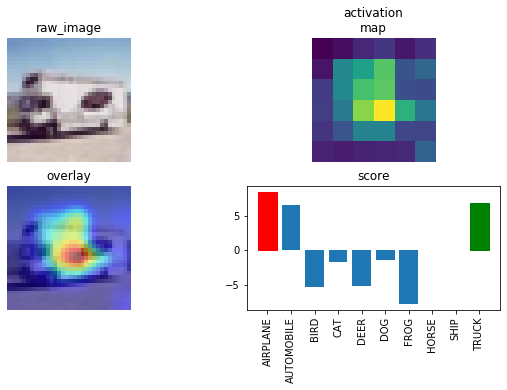

In [7]:
show_misclassification(trainer)